# Experiment 4 - ANN Model - Breast Cancer Prediction - Early Stopping & Dropout


## Dataset

**Dataset Link**: https://www.kaggle.com/harlfoxem/housesalesprediction

### Dataset Description

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#### Feature Columns

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


## Installing Depenedencies

In [20]:
! pip install tabulate numpy pandas matplotlib seaborn

ERROR: Invalid requirement: 'tabulate,'


## Code


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

In [22]:
# Loading and Initial Data Check
df = pd.read_csv('cancer_classification.csv')
print(df.head().to_markdown())

|    |   mean radius |   mean texture |   mean perimeter |   mean area |   mean smoothness |   mean compactness |   mean concavity |   mean concave points |   mean symmetry |   mean fractal dimension |   radius error |   texture error |   perimeter error |   area error |   smoothness error |   compactness error |   concavity error |   concave points error |   symmetry error |   fractal dimension error |   worst radius |   worst texture |   worst perimeter |   worst area |   worst smoothness |   worst compactness |   worst concavity |   worst concave points |   worst symmetry |   worst fractal dimension |   benign_0__mal_1 |
|---:|--------------:|---------------:|-----------------:|------------:|------------------:|-------------------:|-----------------:|----------------------:|----------------:|-------------------------:|---------------:|----------------:|------------------:|-------------:|-------------------:|--------------------:|------------------:|-----------------------:|---------

In [23]:
# understanding the data
print("Data Info")
print(df.info())

print("/n")

print("Data Description")
print(df.describe().transpose().to_markdown())

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error

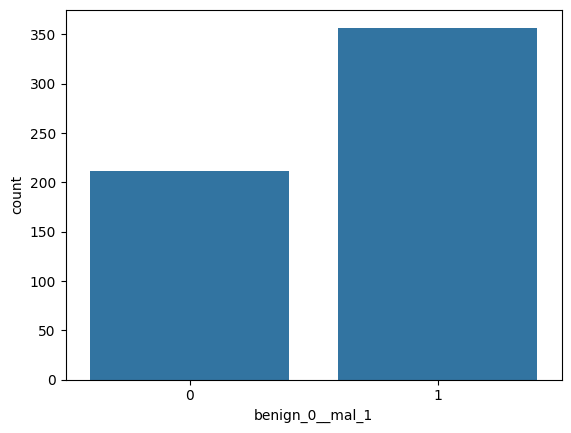

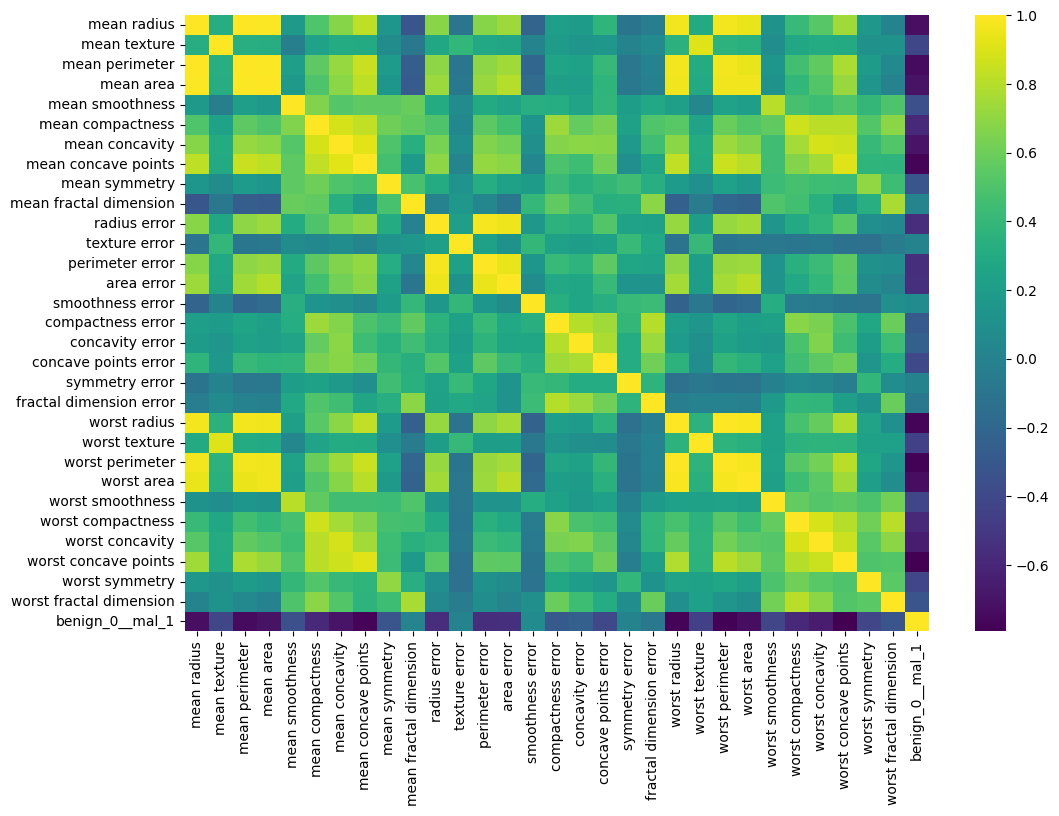

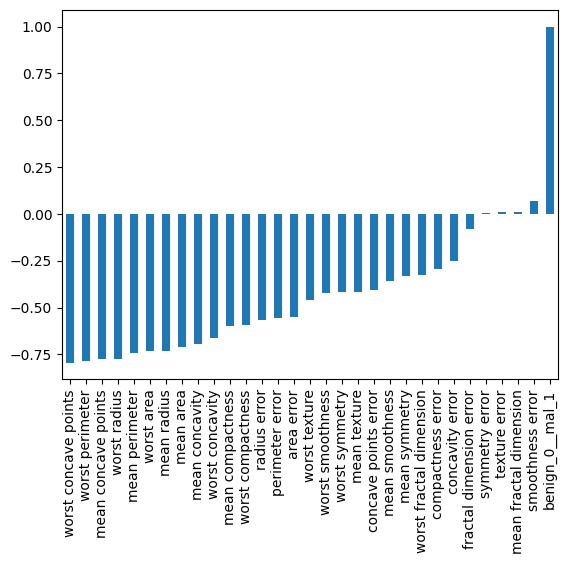

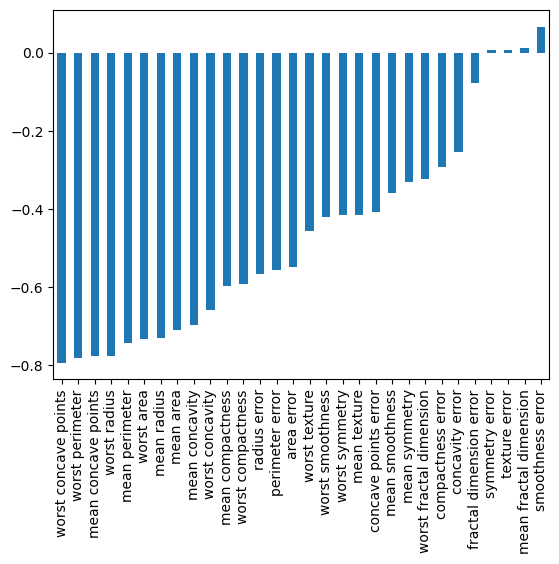

In [24]:

# Exploratory Data Analysis (EDA)
# Distribution of Target Variable
sns.countplot(x='benign_0__mal_1', data=df)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='viridis')
plt.show()

# Correlation with Target Variable
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')
plt.show()
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')
plt.show()


In [25]:
# Train Test Split
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=101)


In [26]:
# Scaling Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Epoch 1/600
14/14 [==============================] - 1s 19ms/step - loss: 0.6714 - accuracy: 0.5094 - val_loss: 0.6463 - val_accuracy: 0.7203
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6386 - accuracy: 0.8592 - val_loss: 0.6167 - val_accuracy: 0.8811
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6077 - accuracy: 0.8873 - val_loss: 0.5825 - val_accuracy: 0.8252
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5686 - accuracy: 0.9061 - val_loss: 0.5440 - val_accuracy: 0.8881
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5286 - accuracy: 0.9225 - val_loss: 0.5016 - val_accuracy: 0.8951
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4847 - accuracy: 0.9225 - val_loss: 0.4562 - val_accuracy: 0.9021
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4389 - accuracy: 0.9202 - val_loss: 0.4098 - val_accuracy: 0.9231
Epoch 8/600


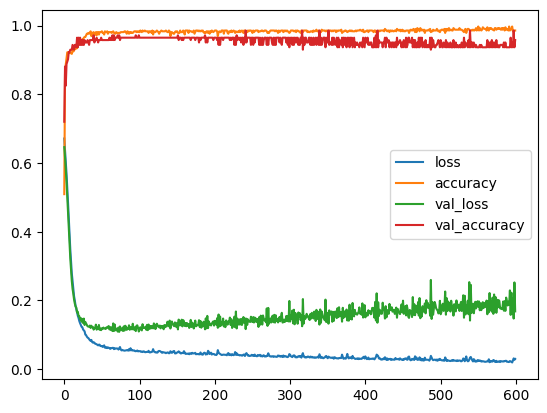

In [27]:


# Creating the Model
model = Sequential([
    Dense(units=30, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Training the Model - Example One: Overfitting
model.fit(x=X_train, y=y_train, epochs=600,
          validation_data=(X_test, y_test), verbose=1)
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()

# Example Two: Early Stopping to prevent overfitting
# Resetting the model
model = Sequential([
    Dense(units=30, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam')


Epoch 1/600
14/14 [==============================] - 0s 20ms/step - loss: 0.0738 - val_loss: 0.0996
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0866 - val_loss: 0.0963
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0769 - val_loss: 0.1059
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0619 - val_loss: 0.0989
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0833 - val_loss: 0.1028
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0823 - val_loss: 0.1058
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0784 - val_loss: 0.0885
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0791 - val_loss: 0.0878
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0999 - val_loss: 0.1011
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0806 - val_loss: 0.1070
Epoch 11

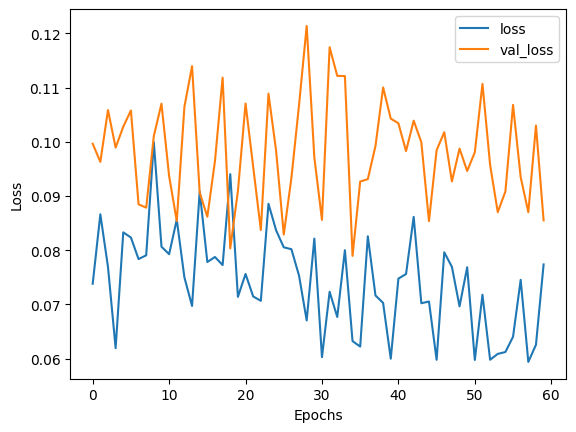

In [31]:

# Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(
    X_test, y_test), callbacks=[early_stop], verbose=1)
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.7055 - val_loss: 0.6771
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6901 - val_loss: 0.6632
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6764 - val_loss: 0.6524
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6493 - val_loss: 0.6362
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6209 - val_loss: 0.6125
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6275 - val_loss: 0.5832
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5814 - val_loss: 0.5544
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5807 - val_loss: 0.5327
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5715 - val_loss: 0.5080
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5325 - val_loss: 0.4816
Epoch 11

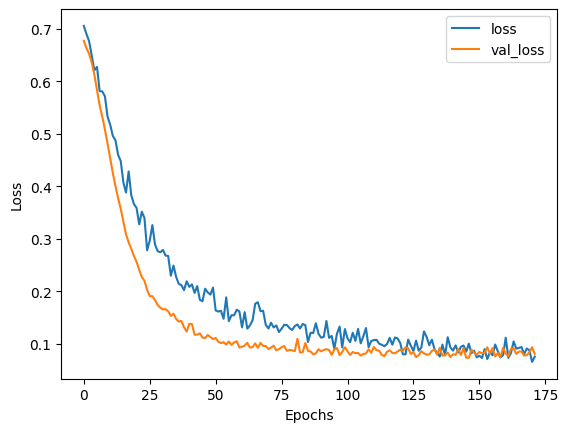

In [32]:
# Adding in DropOut Layers
# Resetting the model
model = Sequential([
    Dense(units=30, activation='relu'),
    Dropout(0.5),
    Dense(units=15, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam')

# Training with Dropout layers
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(
    X_test, y_test), callbacks=[early_stop], verbose=1)
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [33]:
# Model Evaluation using the `predict` method
predictions = model.predict(X_test)

# Convert probabilities to class labels
predictions = (predictions > 0.5).astype(int)

# Now you can use classification_report and confusion_matrix as before
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


5/5 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

[[54  1]
 [ 2 86]]
